In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../TrainData/Concrete_Data.csv', names = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_aggregate', 'fine_aggregate', 'age', 'compressive_strength'], skiprows=[0])
data

,cement,blask_furnace_slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
data.isna().sum()
data.isin([np.inf, -np.inf]).sum()

cement                  0
blask_furnace_slag      0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

In [3]:
import dtale
sheet = dtale.show(data)
sheet

#### from the exploratory data analysis it can be found that 
- cement, water, coarse aggragate, fine aggragate have aproximate normal distribution
- Rest of the features are left skewed and can be normalised by log transformation
- Some of the features show somewhat linear relation with the target variable hence linear regression might be a good choice
- No high correlations are shown between the independent features hence all features can be considered for model building
- Outliers are relatevely very few and hence need not be concerned.
- scaling is a must becouse meny features and huge difference in its magnitudes


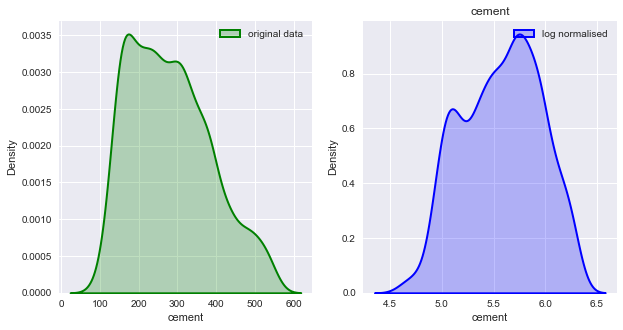

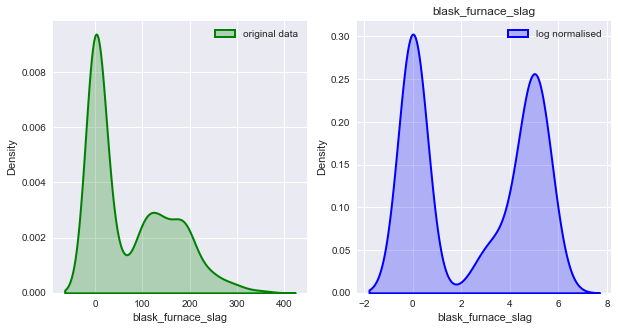

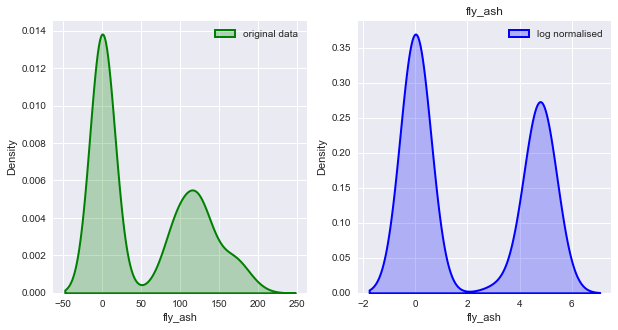

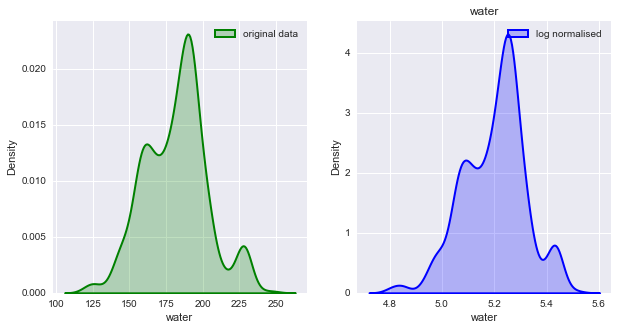

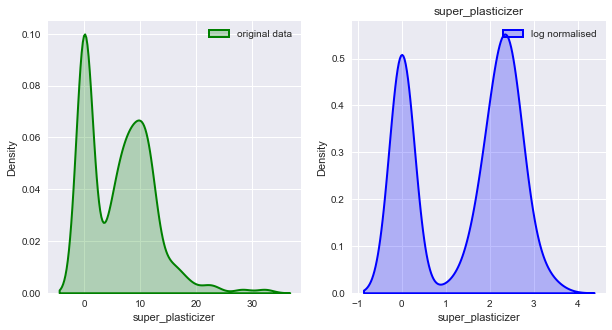

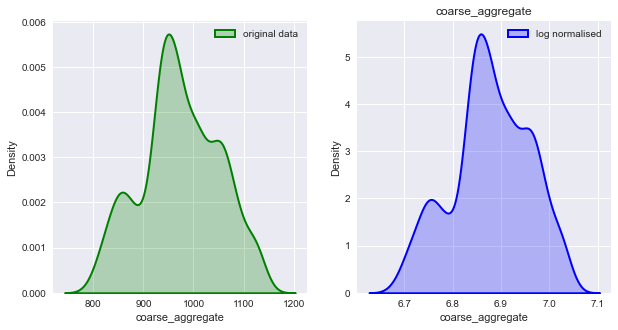

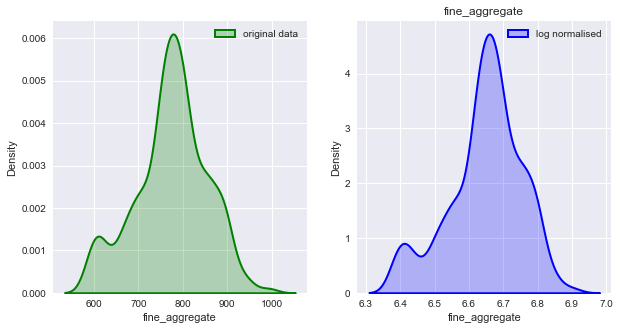

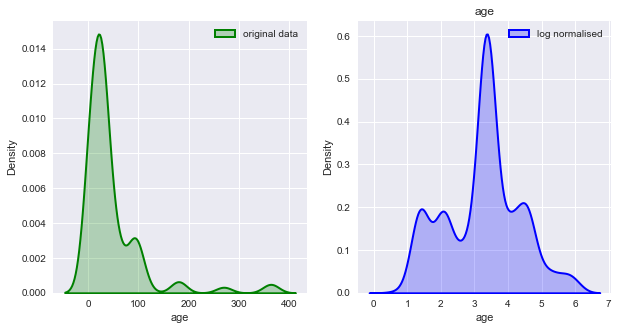

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

y = data.compressive_strength
x_tr = data.drop('compressive_strength', axis=1).copy()
x_tr = x_tr.apply(lambda x:np.log1p(x), axis=1) # log transformation
# def boxcox_tr(data): # box cox transformation
#     columns = data.columns
#     for col in columns:
#         arr_, lmda = stats.boxcox(data[col] + 0.001)
#         data[col] = arr_
#     return data

# data_tr_bx = boxcox_tr(data_tr)
for col in  x_tr.columns:
    fig, ax = plt.subplots(1,2)
    sns.distplot(data[col], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "original data", color ="green", ax = ax[0])
    sns.distplot(x_tr[col], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "log normalised", color ="blue", ax = ax[1])
    ax[0].legend()
    ax[1].legend()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    plt.title(col)
    plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_tr), columns=x_tr.columns)
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: compressive_strength, Length: 1030, dtype: float64

##### feature transformation and preprocessing completed. Lets try following algorithms
1. Linear regression (degree 1), ridge, lasso, 
2. Linear regression (degree 2), ridge, lasso, 
3. Linear regression (degree 3), ridge, lasso,
4. Random Forest Regressor
5. Xgboost
6. Adaboost
7. SVM 


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

def fitAndPrintScore(model, model_name, x_train, y_train, x_test, y_test, deg=None):
    model.fit(x_train, y_train)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    if deg != None:
        print(f"for {model_name} (degree={deg}) train score :{model_train_score}, test score:{model_test_score}")
    else:
        print(f"for {model_name} train score :{model_train_score}, test score:{model_test_score}")

poly_degs = [1, 2, 3]
models = {'Linear Regression':LinearRegression(), 'Ridge regression':Ridge(), 'Lasso Regression':Lasso(), 'Elastic net Regression':ElasticNet()}
for deg in poly_degs:
    poly = PolynomialFeatures(degree=deg, include_bias=False, interaction_only=True)
    x_p = poly.fit_transform(x)
    x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p, y, test_size=0.2, random_state=100)
    for model_name, model in models.items():
        fitAndPrintScore(model, model_name, x_p_train, y_p_train, x_p_test, y_p_test, deg = deg)
    print('\n')



for Linear Regression (degree=1) train score :0.8033490205618946, test score:0.79840961963406
for Ridge regression (degree=1) train score :0.8033466416443549, test score:0.7985402820837778
for Lasso Regression (degree=1) train score :0.7811426804957018, test score:0.7834281596430979
for Elastic net Regression (degree=1) train score :0.679246344141482, test score:0.6945939758656285


for Linear Regression (degree=2) train score :0.8758735235508016, test score:0.8295992460339366
for Ridge regression (degree=2) train score :0.8758566315855969, test score:0.8299480185943985
for Lasso Regression (degree=2) train score :0.7898744479117337, test score:0.7915489462669385
for Elastic net Regression (degree=2) train score :0.705585202802357, test score:0.7140248010572832


for Linear Regression (degree=3) train score :0.9138363843703908, test score:0.8208859970948704
for Ridge regression (degree=3) train score :0.913307887716653, test score:0.8212231367792472
for Lasso Regression (degree=3) trai

##### considering the overfitting and test score polynomial ridge regression with degree 2 will be a good choice

In [41]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
x_p = poly.fit_transform(x)
y_p = y


def objective(trial):
    params = {
        'alpha':trial.suggest_float('alpha', 1e-10, 10, log = True),
        # 'fit_intercept':trial.suggest_categorical('fit_intercept', [True, False]),
        'solver': trial.suggest_categorical('solver', ['sparse_cg', 'cholesky', 'svd', 'lsqr', 'sag' , 'saga'])
    }
    
    x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p, y, test_size=0.2, random_state=100)

    ridge = Ridge(**params)
    ridge.fit(x_p_train, y_p_train)
    test_score = ridge.score(x_p_test, y_p_test)
    return test_score    

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 200)
# Ridge._get_param_names()


[I 2022-01-09 16:45:17,473] A new study created in memory with name: no-name-2bcc128b-e0a8-4a0c-bfc0-e23d45e3a9e2
[I 2022-01-09 16:45:17,494] Trial 0 finished with value: 0.8299225292187491 and parameters: {'alpha': 1.0297202235638988e-05, 'solver': 'lsqr'}. Best is trial 0 with value: 0.8299225292187491.
[I 2022-01-09 16:45:17,513] Trial 1 finished with value: 0.829922525969117 and parameters: {'alpha': 1.1613589484525772e-08, 'solver': 'lsqr'}. Best is trial 0 with value: 0.8299225292187491.
[I 2022-01-09 16:45:17,589] Trial 2 finished with value: 0.8295601001170848 and parameters: {'alpha': 0.006125536268067577, 'solver': 'saga'}. Best is trial 0 with value: 0.8299225292187491.
[I 2022-01-09 16:45:17,627] Trial 3 finished with value: 0.8296719421299388 and parameters: {'alpha': 0.17550455514959226, 'solver': 'sag'}. Best is trial 0 with value: 0.8299225292187491.
[I 2022-01-09 16:45:17,645] Trial 4 finished with value: 0.8295992476400136 and parameters: {'alpha': 4.361327386406185e-

In [42]:
params = study.best_trial.params
params
# params = {'alpha': 9.99081794015465, 'solver': 'svd'}


{'alpha': 9.99081794015465, 'solver': 'svd'}

In [51]:
params = {'alpha': 10, 'solver': 'svd'}
x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p, y_p, test_size=0.2, random_state=100)

ridge_reg = Ridge(**params)
fitAndPrintScore(ridge_reg, "Ridge regression", x_p_train, y_p_train, x_p_test, y_p_test, deg=2)

for Ridge regression (degree=2) train score :0.8748495329165652, test score:0.8320171755774413


In [54]:
## random forest
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

rf = RandomForestRegressor()
fitAndPrintScore(rf, 'Random Forest regression', x_train, y_train, x_test, y_test)

rf._get_param_names()


for Random Forest regression train score :0.9878820984808796, test score:0.8860139128151717


['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [59]:
# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor()
# path = dt.cost_complexity_pruning_path(x_train, y_train)
# ccp_alphas = path.ccp_alphas
# ccp_alphas

array([0.00000000e+00, 6.89847316e-17, 6.89847316e-17, 1.37969463e-16,
       2.75938927e-16, 2.75938927e-16, 5.51877853e-16, 5.51877853e-16,
       5.51877853e-16, 8.27816780e-16, 8.27816780e-16, 1.10375571e-15,
       1.10375571e-15, 1.10375571e-15, 1.65563356e-15, 1.65563356e-15,
       6.06796101e-08, 6.06796109e-08, 6.06796112e-08, 6.06796112e-08,
       6.06796112e-08, 6.06796114e-08, 6.06796115e-08, 6.06796116e-08,
       6.06796116e-08, 6.06796116e-08, 6.06796117e-08, 6.06796118e-08,
       6.06796118e-08, 6.06796118e-08, 6.06796118e-08, 6.06796126e-08,
       2.42718446e-07, 2.42718447e-07, 2.42718447e-07, 2.42718447e-07,
       2.42718447e-07, 3.23624595e-07, 9.70873785e-07, 9.70873786e-07,
       9.70873786e-07, 9.70873787e-07, 1.29449838e-06, 1.51699029e-06,
       1.51699029e-06, 1.63834952e-06, 2.02265372e-06, 2.18446602e-06,
       2.18446602e-06, 2.97330097e-06, 3.88349515e-06, 3.96440129e-06,
       4.55097087e-06, 4.91504854e-06, 4.91504854e-06, 4.91504854e-06,
      

In [72]:
# parameter tuning of random forest

def objective(trial):
    params = {
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10,200),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 16)
    }
    rf_reg = RandomForestRegressor(**params)
    rf_reg.fit(x_train, y_train)
    test_score = rf_reg.score(x_test, y_test)
    # train_score = rf_reg.score(x_train, y_train)
    # if test_score >= 0.90 and train_score > test_score:
    #     diff = train_score - test_score
    # else:
    #     diff = 1
    # return diff

    return test_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2022-01-09 18:15:30,798] A new study created in memory with name: no-name-b8a9ca66-411a-40f2-b4bd-cc6097e8f60c
[I 2022-01-09 18:15:31,383] Trial 0 finished with value: 0.725249860264519 and parameters: {'bootstrap': False, 'max_features': 'auto', 'max_depth': 5, 'n_estimators': 143, 'min_samples_split': 5}. Best is trial 0 with value: 0.725249860264519.
[I 2022-01-09 18:15:31,754] Trial 1 finished with value: 0.4589433397747925 and parameters: {'bootstrap': False, 'max_features': 'auto', 'max_depth': 2, 'n_estimators': 172, 'min_samples_split': 7}. Best is trial 0 with value: 0.725249860264519.
[I 2022-01-09 18:15:32,274] Trial 2 finished with value: 0.8873881518301205 and parameters: {'bootstrap': False, 'max_features': 'sqrt', 'max_depth': 24, 'n_estimators': 189, 'min_samples_split': 10}. Best is trial 2 with value: 0.8873881518301205.
[I 2022-01-09 18:15:32,400] Trial 3 finished with value: 0.45975786222027426 and parameters: {'bootstrap': False, 'max_features': 'sqrt', 'max_dep

In [76]:
params = study.best_trial.params
params

{'bootstrap': False,
 'max_features': 'sqrt',
 'max_depth': 24,
 'n_estimators': 111,
 'min_samples_split': 3}

In [83]:
best_test_params = {'bootstrap': False,
 'max_features': 'sqrt',
 'max_depth': 24,
 'n_estimators': 111,
 'min_samples_split': 3}

rf = RandomForestRegressor(**best_test_params)
fitAndPrintScore(rf, 'RandomForestRegressor', x_train, y_train, x_test, y_test)

for RandomForestRegressor train score :0.9951340778806562, test score:0.9092901509338353


In [87]:
# XGBOOST 
from xgboost import XGBRegressor
xgb = XGBRegressor()
fitAndPrintScore(rf, 'RandomForestRegressor', x_train, y_train, x_test, y_test)
xgb.get_xgb_params()

for RandomForestRegressor train score :0.99537616084467, test score:0.9066844575990783


{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [88]:
# tuning of xgbregressor
def objective(trial):
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'eta':trial.suggest_float('eta', 0.005, 0.5, log=True),
        'gamma':trial.suggest_float('gamma', 0.01, 20, log = True),
        'max_depth': trial.suggest_int('max_depth', 2, 16, log=True),
        'subsample':trial.suggest_float('subsample', 0.5, 1),
        'lambda':trial.suggest_float('lambda', 0.01, 10, log = True)
    }
    rf_reg = XGBRegressor(**params)
    rf_reg.fit(x_train, y_train)
    test_score = rf_reg.score(x_test, y_test)
    # train_score = rf_reg.score(x_train, y_train)
    # if test_score >= 0.90 and train_score > test_score:
    #     diff = train_score - test_score
    # else:
    #     diff = 1
    # return diff
    return test_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-01-09 20:05:04,810] A new study created in memory with name: no-name-bfe6b026-8378-4a68-a3f8-e765f0c5b017
[I 2022-01-09 20:05:05,742] Trial 0 finished with value: 0.29589662235045155 and parameters: {'booster': 'gblinear', 'eta': 0.03557991424290221, 'gamma': 0.23730458979639796, 'max_depth': 3, 'subsample': 0.6085678701516197, 'lambda': 4.036850846809677}. Best is trial 0 with value: 0.29589662235045155.


[20:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:06,589] Trial 1 finished with value: 0.9059890107007665 and parameters: {'booster': 'dart', 'eta': 0.06471584423669721, 'gamma': 3.1912160610506697, 'max_depth': 6, 'subsample': 0.8679487074547032, 'lambda': 0.018979241227997434}. Best is trial 1 with value: 0.9059890107007665.
[I 2022-01-09 20:05:06,877] Trial 2 finished with value: -0.07155093462285 and parameters: {'booster': 'gbtree', 'eta': 0.008247476904423606, 'gamma': 0.10730351267255324, 'max_depth': 6, 'subsample': 0.7477856926889573, 'lambda': 0.028828793822683486}. Best is trial 1 with value: 0.9059890107007665.
[I 2022-01-09 20:05:07,522] Trial 3 finished with value: 0.5609326031455866 and parameters: {'booster': 'dart', 'eta': 0.014926575528013923, 'gamma': 0.019482719377710622, 'max_depth': 5, 'subsample': 0.9745915584783768, 'lambda': 1.7292728895530427}. Best is trial 1 with value: 0.9059890107007665.
[I 2022-01-09 20:05:07,640] Trial 4 finished with value: 0.8028246325149522 and parameters: {'boost

[20:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:15,169] Trial 16 finished with value: 0.9024211614552733 and parameters: {'booster': 'dart', 'eta': 0.28695304842871217, 'gamma': 0.2986385877669869, 'max_depth': 7, 'subsample': 0.805418523263547, 'lambda': 0.28570186127351993}. Best is trial 12 with value: 0.9144200784379346.
[I 2022-01-09 20:05:15,965] Trial 17 finished with value: 0.7400713069568721 and parameters: {'booster': 'dart', 'eta': 0.023716196346534827, 'gamma': 14.379138551933895, 'max_depth': 11, 'subsample': 0.9815046845388811, 'lambda': 8.643902788780972}. Best is trial 12 with value: 0.9144200784379346.
[I 2022-01-09 20:05:16,526] Trial 18 finished with value: 0.897508947116651 and parameters: {'booster': 'dart', 'eta': 0.12470115145533679, 'gamma': 0.934557781647203, 'max_depth': 3, 'subsample': 0.78683399499504, 'lambda': 0.2913878134510688}. Best is trial 12 with value: 0.9144200784379346.
[I 2022-01-09 20:05:16,617] Trial 19 finished with value: 0.7997523228411878 and parameters: {'booster': '

[20:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:17,558] Trial 20 finished with value: 0.8601151542208715 and parameters: {'booster': 'dart', 'eta': 0.02685405903757824, 'gamma': 0.4749174210120036, 'max_depth': 12, 'subsample': 0.9203546547442123, 'lambda': 0.7788675668925381}. Best is trial 12 with value: 0.9144200784379346.
[I 2022-01-09 20:05:18,367] Trial 21 finished with value: 0.9109683156002527 and parameters: {'booster': 'dart', 'eta': 0.06547505634497133, 'gamma': 2.927924146299877, 'max_depth': 7, 'subsample': 0.8673553253111406, 'lambda': 0.013707441860682434}. Best is trial 12 with value: 0.9144200784379346.
[I 2022-01-09 20:05:19,243] Trial 22 finished with value: 0.9088844283573194 and parameters: {'booster': 'dart', 'eta': 0.0844006427131711, 'gamma': 1.1943703594961823, 'max_depth': 8, 'subsample': 0.8563956574207, 'lambda': 0.17843217951958057}. Best is trial 12 with value: 0.9144200784379346.
[I 2022-01-09 20:05:19,843] Trial 23 finished with value: 0.9143794944451512 and parameters: {'booster':

[20:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:21,734] Trial 27 finished with value: 0.9156425174454107 and parameters: {'booster': 'dart', 'eta': 0.14049397987835457, 'gamma': 11.416560153211687, 'max_depth': 4, 'subsample': 0.6295165611097135, 'lambda': 0.0197799285840841}. Best is trial 27 with value: 0.9156425174454107.
[I 2022-01-09 20:05:22,463] Trial 28 finished with value: 0.9149608945586454 and parameters: {'booster': 'dart', 'eta': 0.30007999629337284, 'gamma': 10.34285822235778, 'max_depth': 4, 'subsample': 0.5154745053380237, 'lambda': 0.09595000006637343}. Best is trial 27 with value: 0.9156425174454107.
[I 2022-01-09 20:05:22,552] Trial 29 finished with value: 0.8005707190709803 and parameters: {'booster': 'gblinear', 'eta': 0.480645725323528, 'gamma': 11.79311004892538, 'max_depth': 3, 'subsample': 0.5167989101347932, 'lambda': 0.04452139641276099}. Best is trial 27 with value: 0.9156425174454107.


[20:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:23,234] Trial 30 finished with value: 0.9104961665860372 and parameters: {'booster': 'dart', 'eta': 0.2783635357758334, 'gamma': 10.078970747773756, 'max_depth': 4, 'subsample': 0.5944853484494714, 'lambda': 0.023920551909399183}. Best is trial 27 with value: 0.9156425174454107.
[I 2022-01-09 20:05:23,954] Trial 31 finished with value: 0.9168342663858372 and parameters: {'booster': 'dart', 'eta': 0.2285527483152262, 'gamma': 4.056938753756393, 'max_depth': 5, 'subsample': 0.5940877756717057, 'lambda': 0.08775652363244892}. Best is trial 31 with value: 0.9168342663858372.
[I 2022-01-09 20:05:24,599] Trial 32 finished with value: 0.9071188142338733 and parameters: {'booster': 'dart', 'eta': 0.35955083799127907, 'gamma': 4.598202805163886, 'max_depth': 5, 'subsample': 0.5913292799542829, 'lambda': 0.08463528897295455}. Best is trial 31 with value: 0.9168342663858372.
[I 2022-01-09 20:05:25,299] Trial 33 finished with value: 0.9132260829122067 and parameters: {'booster'

[20:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:28,572] Trial 39 finished with value: 0.9076213937215003 and parameters: {'booster': 'dart', 'eta': 0.1329771768170213, 'gamma': 0.010631927081907357, 'max_depth': 5, 'subsample': 0.585368011735124, 'lambda': 0.04549704644270759}. Best is trial 31 with value: 0.9168342663858372.
[I 2022-01-09 20:05:28,926] Trial 40 finished with value: 0.9069295808816991 and parameters: {'booster': 'gbtree', 'eta': 0.17881707142700787, 'gamma': 6.676575161576467, 'max_depth': 6, 'subsample': 0.6511601511128355, 'lambda': 0.034182774906397546}. Best is trial 31 with value: 0.9168342663858372.
[I 2022-01-09 20:05:29,774] Trial 41 finished with value: 0.9126562877042229 and parameters: {'booster': 'dart', 'eta': 0.09000116145094268, 'gamma': 8.020605587878492, 'max_depth': 5, 'subsample': 0.7328479932590004, 'lambda': 0.1272748253230664}. Best is trial 31 with value: 0.9168342663858372.
[I 2022-01-09 20:05:30,479] Trial 42 finished with value: 0.911382171954826 and parameters: {'booste

[20:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:40,396] Trial 58 finished with value: -0.8799696381645123 and parameters: {'booster': 'dart', 'eta': 0.005500943740255361, 'gamma': 8.211748173284445, 'max_depth': 3, 'subsample': 0.8801112205046909, 'lambda': 0.01148268077870343}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:05:40,933] Trial 59 finished with value: 0.9129823063413776 and parameters: {'booster': 'dart', 'eta': 0.25910472111635546, 'gamma': 5.568483886729097, 'max_depth': 3, 'subsample': 0.7930190387170876, 'lambda': 0.018243873891707993}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:05:41,120] Trial 60 finished with value: 0.9070346803957168 and parameters: {'booster': 'gbtree', 'eta': 0.19373783624937332, 'gamma': 0.27642277211964755, 'max_depth': 3, 'subsample': 0.958392496879478, 'lambda': 0.01025791211249235}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:05:41,752] Trial 61 finished with value: 0.9139775461686844 and parameters: {'bo

[20:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:05:47,142] Trial 70 finished with value: 0.8996106301137304 and parameters: {'booster': 'dart', 'eta': 0.14739781683309555, 'gamma': 0.036009957995939174, 'max_depth': 3, 'subsample': 0.7304454940697285, 'lambda': 0.01982735950756907}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:05:47,764] Trial 71 finished with value: 0.912118181923897 and parameters: {'booster': 'dart', 'eta': 0.28728277768586546, 'gamma': 10.581683267731075, 'max_depth': 4, 'subsample': 0.8312972153622404, 'lambda': 0.06717211517999212}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:05:48,454] Trial 72 finished with value: 0.894503580440073 and parameters: {'booster': 'dart', 'eta': 0.39742206382035383, 'gamma': 7.513961319777478, 'max_depth': 5, 'subsample': 0.7488895025972302, 'lambda': 0.04317577088205299}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:05:49,100] Trial 73 finished with value: 0.9002212403701273 and parameters: {'booste

[20:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-09 20:06:00,325] Trial 89 finished with value: 0.909858836868828 and parameters: {'booster': 'dart', 'eta': 0.3170392688677953, 'gamma': 0.6963788408602977, 'max_depth': 5, 'subsample': 0.6786850847743416, 'lambda': 0.015438580403923131}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:06:01,168] Trial 90 finished with value: 0.9076019951926455 and parameters: {'booster': 'dart', 'eta': 0.20852138095332207, 'gamma': 3.9851675234759596, 'max_depth': 7, 'subsample': 0.6017945664007572, 'lambda': 0.018731272648520963}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:06:02,005] Trial 91 finished with value: 0.905192436448119 and parameters: {'booster': 'dart', 'eta': 0.17093835487426073, 'gamma': 15.892788666907167, 'max_depth': 6, 'subsample': 0.7623109551146446, 'lambda': 0.04430600219978641}. Best is trial 55 with value: 0.9226994143292099.
[I 2022-01-09 20:06:02,773] Trial 92 finished with value: 0.9047468670313725 and parameters: {'booste

In [89]:
params = study.best_trial.params
params

{'booster': 'dart',
 'eta': 0.4632229410828487,
 'gamma': 7.077192780534438,
 'max_depth': 3,
 'subsample': 0.8092309111849526,
 'lambda': 0.015342068089733317}

In [90]:
params = {'booster': 'dart',
 'eta': 0.4632229410828487,
 'gamma': 7.077192780534438,
 'max_depth': 3,
 'subsample': 0.8092309111849526,
 'lambda': 0.015342068089733317}

xgb_r = XGBRegressor(**params)
fitAndPrintScore(xgb_r, 'xgboost regression', x_train, y_train, x_test, y_test)

for xgboost regression train score :0.9833078295824782, test score:0.9226994143292099


In [93]:
# adaboost
from sklearn.ensemble import AdaBoostRegressor
ab_reg = AdaBoostRegressor()
fitAndPrintScore(ab_reg, 'adaboost regression', x_train, y_train, x_test, y_test)
# ab_reg._get_param_names()

for adaboost regression train score :0.8308944091860474, test score:0.7902519661872716


['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state']

In [94]:
# parameter tuning adaboost
def objective(trial):
    params = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 500, step = 5),
        'loss':trial.suggest_categorical('loss', ['linear', 'square', 'exponential']),
        'learning_rate':trial.suggest_float('learning_rate', 10-5, 10, log=True)
    }
    adb = AdaBoostRegressor(**params)
    adb.fit(x_train, y_train)
    test_score = adb.score(x_test, y_test)
    return test_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2022-01-09 20:26:51,637] A new study created in memory with name: no-name-f20aa47f-7621-45a7-9e6d-7a5e0defc8ab
[I 2022-01-09 20:26:52,796] Trial 0 finished with value: 0.7482780798281652 and parameters: {'n_estimators': 330, 'loss': 'exponential', 'learning_rate': 5.5429015846007434}. Best is trial 0 with value: 0.7482780798281652.
[I 2022-01-09 20:26:52,965] Trial 1 finished with value: -6.73021691520963 and parameters: {'n_estimators': 65, 'loss': 'square', 'learning_rate': 9.90613415201616}. Best is trial 0 with value: 0.7482780798281652.
[I 2022-01-09 20:26:53,020] Trial 2 finished with value: -1.1219996986268672 and parameters: {'n_estimators': 20, 'loss': 'linear', 'learning_rate': 9.083921540945402}. Best is trial 0 with value: 0.7482780798281652.
[I 2022-01-09 20:26:53,297] Trial 3 finished with value: 0.35816719764414884 and parameters: {'n_estimators': 135, 'loss': 'linear', 'learning_rate': 6.564305873067367}. Best is trial 0 with value: 0.7482780798281652.
[I 2022-01-09 

In [96]:
params = study.best_trial.params
adaboost = AdaBoostRegressor(**params)
fitAndPrintScore(adaboost, 'adaboost regression', x_train, y_train, x_test, y_test)

for adaboost regression train score :0.8366892105452135, test score:0.8072294640563183


In [98]:
# SVR
from sklearn.svm import SVR
svr = SVR()
fitAndPrintScore(svr, "Support vector machine reggression", x_train, y_train, x_test, y_test)
svr._get_param_names()

for Support vector machine reggression train score :0.8174638399845694, test score:0.8008592285011187


['C',
 'cache_size',
 'coef0',
 'degree',
 'epsilon',
 'gamma',
 'kernel',
 'max_iter',
 'shrinking',
 'tol',
 'verbose']

In [101]:
#  tuning svr
def objective(trial):
    params = {
        'kernel':trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'gamma':trial.suggest_float('gamma', 0.001, 1),
        'epsilon':trial.suggest_float('epsilon', 0.001, 1)
    }
    adb = SVR(**params)
    adb.fit(x_train, y_train)
    test_score = adb.score(x_test, y_test)
    return test_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2022-01-09 20:48:52,989] A new study created in memory with name: no-name-51234082-d0da-4755-a3f7-3500c107e883
[I 2022-01-09 20:48:53,115] Trial 0 finished with value: 0.4450156527327205 and parameters: {'kernel': 'rbf', 'gamma': 0.8042328199150972, 'epsilon': 0.36777727359749185}. Best is trial 0 with value: 0.4450156527327205.
[I 2022-01-09 20:48:53,224] Trial 1 finished with value: 0.7968766858347961 and parameters: {'kernel': 'linear', 'gamma': 0.40402336638582387, 'epsilon': 0.2769910597788262}. Best is trial 1 with value: 0.7968766858347961.
[I 2022-01-09 20:48:53,333] Trial 2 finished with value: -14.462565184458391 and parameters: {'kernel': 'sigmoid', 'gamma': 0.9949262396422521, 'epsilon': 0.3503732679347782}. Best is trial 1 with value: 0.7968766858347961.
[I 2022-01-09 20:48:53,404] Trial 3 finished with value: 0.5383314709283976 and parameters: {'kernel': 'rbf', 'gamma': 0.5713537885330752, 'epsilon': 0.9767755916941978}. Best is trial 1 with value: 0.7968766858347961.


In [102]:
params = study.best_trial.params
svr = SVR(**params)
fitAndPrintScore(svr, "Support vector machine reggression", x_train, y_train, x_test, y_test)

for Support vector machine reggression train score :0.908526088064583, test score:0.8673610364182189


* from the above expirimentations it can be decided to go with ridge reggression with degree 2, random_forest and xgboost for the model building with parameter tuning in the project. for clustering kmean clustering can be adopted before choosing each algorithm according to their performance on each cluster.  